In [1]:
import pandas as pd
import os
from os import listdir

import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)                               # 한글폰트 설정(전역)

import warnings
warnings.filterwarnings('ignore')

In [7]:
##########
# 자료 불러오기 : 네이버
#####

# 경로 설정
directory_name = "./review_naver"

# 파일명 가져오기
file_names = listdir(directory_name)

# 불필요한 파일 삭제
# file_names.remove('자료확보 기준.JPG')
print('Merge 대상 파일 : {}개'.format(len(file_names)))


Merge 대상 파일 : 10개


In [ ]:
# file_names

In [10]:
data = pd.DataFrame()

# 전체 자료 불러오기 & 병합
for open_file in file_names:
    df_temp = pd.read_excel(directory_name +'/'+ open_file,'Report')
    data = pd.concat([data, df_temp], ignore_index=True)

In [11]:
data['주문일시'] = pd.to_datetime(data['주문일시'],format=None)

In [27]:
data.tail(5)

,주문일시,매장명,별점,리뷰,답글,리뷰 링크,메뉴명,수량,주문금액,테마,매장유입,검색유입
56788,2021-01-31,폴바셋 현대 프리미엄아울렛 김포점,4.0,맛있어요~~,NaN,https://m.booking.naver.com/review/bizes/34457...,카페라떼,1,12100,NaN,N,Y
56789,2021-01-31,폴바셋 현대 프리미엄아울렛 김포점,4.0,맛있어요~~,NaN,https://m.booking.naver.com/review/bizes/34457...,시나몬라떼,1,12100,NaN,N,Y
56790,2021-01-30,폴바셋 현대백화점 대구점,5.0,폴바셋 아이스크림류는 다 엄지척!!,NaN,https://m.booking.naver.com/review/bizes/34476...,아이스크림 라떼,1,12800,NaN,Y,N
56791,2021-01-30,폴바셋 현대백화점 대구점,5.0,폴바셋 아이스크림류는 다 엄지척!!,NaN,https://m.booking.naver.com/review/bizes/34476...,나타 오리지널,1,12800,NaN,Y,N
56792,2021-01-30,폴바셋 현대백화점 대구점,5.0,폴바셋 아이스크림류는 다 엄지척!!,NaN,https://m.booking.naver.com/review/bizes/34476...,딸기 혼합 아이스크림 (컵),1,12800,NaN,Y,N


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56793 entries, 0 to 56792
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주문일시    56793 non-null  datetime64[ns]
 1   매장명     56793 non-null  object        
 2   별점      56793 non-null  float64       
 3   리뷰      56793 non-null  object        
 4   답글      1 non-null      object        
 5   리뷰 링크   56793 non-null  object        
 6   메뉴명     56793 non-null  object        
 7   수량      56793 non-null  int64         
 8   주문금액    56793 non-null  int64         
 9   테마      10949 non-null  object        
 10  매장유입    56793 non-null  object        
 11  검색유입    56793 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 5.2+ MB


In [2]:
from konlpy.tag import Okt
okt = Okt("C:/Program Files/Java/jdk-12.0.1/bin/server/jvm.dll")
okt = Okt()

In [21]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += " " + ele.strip()  
    return str1

def tokenize(doc):
    result = ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] # ex '더빙/Norm', '나다/Verb'
    return result 

def tokenize2(doc):
    result = [''.join(t) for t in okt.morphs(doc)] # 말뭉치(명사+ a) ex ['더빙', '나다', ...]
    return result 

In [22]:
##########
# 1차 확인 : 네이버
#####

# 일별 추이
trend1 = data.groupby(by = ['주문일시'], as_index=False)['매장명'].count()

# 평점 분포
trend2 = data.groupby(by = ['별점'], as_index=False)['매장명'].count()

# wordcloud 내용
trend3 = pd.DataFrame()
trend3['내용'] = data['리뷰'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

### 1차 가공 : koNLpy to token
token_data1 = [tokenize(row) for row in trend3['내용']]  

### 2차 가공 : 역토큰화 후, 한글만 남김
data_trim2 = []
for i in range(len(trend3)):
    t = ' '.join(token_data1[i])
    data_trim2.append(t)

NameError: name 'data3' is not defined

In [24]:
trend3['내용'] = data_trim2
trend3['내용'] = trend3['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

### 3차 가공 : 역토큰화 내용 다시 토큰화
data_trim3 = [tokenize2(row) for row in trend3['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  ]  

In [25]:
# wordcloud 준비
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)          

from wordcloud import WordCloud

word1 = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
         '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
         '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
         '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
         '도'
        ]

# text = data[data1['gubun']==1]['text'].to_list()
text = trend3['내용'].to_list()
text_all = listToString(text)
# text_all = text_all.replace("상하 목장", "상하목장")
# text_all = text_all.replace("유통 기한","유통기한")
# text_all = text_all.replace("마이 리틀","마이리틀")
# text_all = text_all.replace("쥬스","주스")
# text_all = text_all.replace("슬로우 밀크","슬로우밀크")

# worldcloud 생성
wc = WordCloud(font_path= path, stopwords = word1, width = 600, height = 600, background_color="white", repeat=True)
wc.generate(text_all)

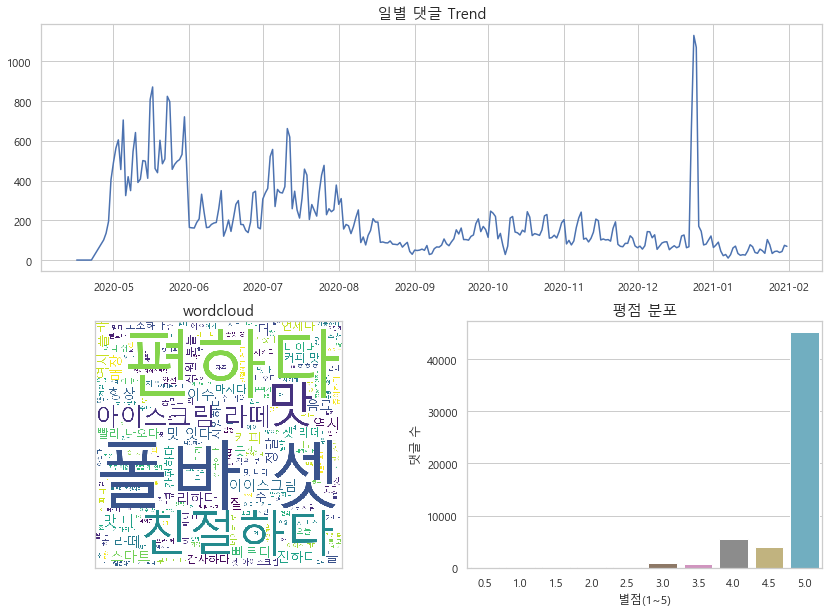

In [26]:
# 결과 show
mpl.rc('figure', figsize=(14, 10))

ax = plt.subplot(2,1,1)
plt.plot('주문일시', '매장명', data=trend1)
plt.title('일별 댓글 Trend',fontsize=15)

ax = plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(wc, cmap=plt.cm.binary)
plt.title('wordcloud',fontsize=15)
# plt.xlabel('전체 / n={:}개'.format(df1.groupby('구매자평점')['구매자평점'].count()))

ax = plt.subplot(2,2,4)
sns.barplot(x="별점", y="매장명", data=trend2)
plt.title('평점 분포',fontsize=15)
plt.xlabel('별점(1~5)')
plt.ylabel('댓글 수')
plt.show()

In [12]:
# 일별/매장별/리뷰별 중복제거
# data2 = data.drop_duplicates(['주문일시', '매장명', '리뷰'])

In [8]:
##########
# 자료 불러오기 : 배민/요기요
#####
df2 = pd.read_excel('210201_외식관계사 리뷰_format.xlsx','배민')

df3 = pd.read_excel('210201_외식관계사 리뷰_format.xlsx','요기요')


In [9]:
df2.tail(2)

,브랜드,매장,채널,주문일자,주문자명,주문메뉴,점수,리뷰,이미지
531,살바토레,광화문점,배달의민족,작년,우리집,디.오.씨새우 루꼴라 샐러드,3,NaN,NaN
532,살바토레,광화문점,배달의민족,작년,집순이이이이이,디.오.씨디아볼라 에 치폴라,5,NaN,NaN


In [10]:
df3.tail(2)

,브랜드,매장,채널,주문일자,주문자명,주문메뉴,점수_맛,점수_양,점수_배달,리뷰,이미지
65,폴바셋,한국경제신문사점,요기요,2020년 12월 21일,09**님,"스페니쉬 라떼/3(음료 선택(Iced),음료 사이즈 선택(Standard size))",1,1,1,기사도 배정안됐는데 배달완료라고 뜨고 카드결재도 안된다고 하고 정말 화가나네요!!,NaN
66,폴바셋,MBC몰파크점,요기요,2020년 12월 25일,bh**님,"카페 라떼/2(HOT or ICE 선택(ICED),사이즈 선택(Standard si...",4,4,4,커피도 맛있고 예쁜 손편지에 루돌프 그림까지 감사합니다 근데 요기요에는 큐브 얼음 ...,NaN


1. Trend 
  + T/S
  + score
2. WordCloud

In [45]:
# trend2.head(10)

In [ ]:
# 자료 불러오기 :Excel 
# import pandas as pd

# # Excel 불러오기
# data1 = pd.read_excel('./210114_네이버 라이브 커머스.xlsx', 'Sheet1')

# # 자료 내 중복 제거
# data1.drop_duplicates(subset = ['내용'], inplace=True)

In [20]:
# data3.head()

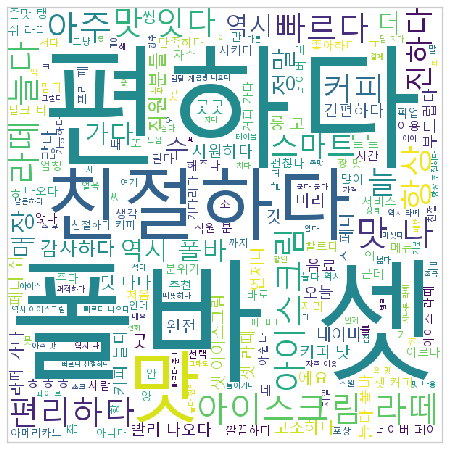

In [22]:
# wordcloud 준비
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)          

from wordcloud import WordCloud

word1 = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
         '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
         '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
         '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
         '도'
        ]

# text = data[data1['gubun']==1]['text'].to_list()
text = data3['내용'].to_list()
text_all = listToString(text)
# text_all = text_all.replace("상하 목장", "상하목장")
# text_all = text_all.replace("유통 기한","유통기한")
# text_all = text_all.replace("마이 리틀","마이리틀")
# text_all = text_all.replace("쥬스","주스")
# text_all = text_all.replace("슬로우 밀크","슬로우밀크")

# worldcloud 생성
wc = WordCloud(font_path= path, stopwords = word1, width = 600, height = 600, background_color="white", repeat=True)
wc.generate(text_all)

mpl.rc('figure', figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(wc, cmap=plt.cm.binary)
# plt.xlabel('전체 / n={:}개'.format(df1.groupby('구매자평점')['구매자평점'].count()))
plt.show()

In [23]:
trend2 = data2.groupby(by = ['별점'], as_index=False)['매장명'].count()

In [24]:
trend2.T

,0,1,2,3,4,5,6,7,8,9
별점,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
매장명,76.0,97.0,56.0,123.0,150.0,669.0,569.0,4106.0,3010.0,34671.0


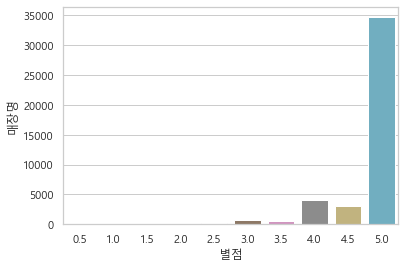

In [97]:
mpl.rc('figure', figsize=(6, 4))
sns.barplot(x="별점", y="매장명", data=trend2)
plt.show()

In [78]:
trend2 = data
trend2['year'] = trend2['주문일시'].dt.year         # 연(4자리숫자)
trend2['month']= trend2['주문일시'].dt.month        # 월(숫자)

trend2['year'] = trend2.year.astype(str)
trend2['month']= trend2.month.astype(str)
trend2['YYYYMM'] = trend2['year'] +'-'+ trend2['month']

trend2 = trend2.groupby(by = ['YYYYMM'], as_index=False)['매장명'].count()

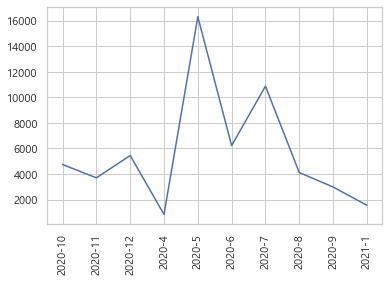

In [81]:
mpl.rc('figure', figsize=(6, 4))
plt.plot('YYYYMM', '매장명', data=trend2)
plt.xticks(rotation=90)
plt.show()

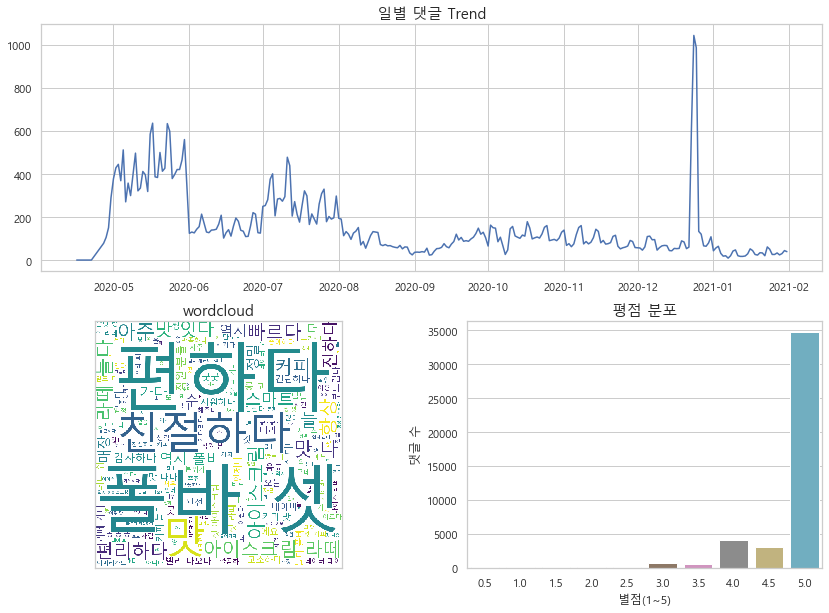

In [39]:
##########
# 자료저장(DataFrame to Excel)
#####

# s_dt1= (datetime.today()- timedelta(0)).strftime('%Y%m%d')

# name = s_dt1+ '_배민_review_data.xlsx'
# writer = pd.ExcelWriter(name)
# data.to_excel(writer, 'Sheet1')
# writer.save()